In [1]:
# import required modules for this project
import pandas as pd 
import numpy as np
import copy

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import median_abs_deviation

In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# read the data
#df = pd.read_csv("../../data/raw/PS_20174392719_1491204439457_log_0.csv")
df = pd.read_csv("PS_20174392719_1491204439457_log_0.csv")
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


In [6]:
df.shape

(1272524, 11)

In [8]:
# print out information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272524 entries, 0 to 1272523
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1272524 non-null  int64  
 1   type            1272524 non-null  object 
 2   amount          1272524 non-null  float64
 3   nameOrig        1272524 non-null  object 
 4   oldbalanceOrg   1272524 non-null  float64
 5   newbalanceOrig  1272524 non-null  float64
 6   nameDest        1272524 non-null  object 
 7   oldbalanceDest  1272524 non-null  float64
 8   newbalanceDest  1272524 non-null  float64
 9   isFraud         1272524 non-null  int64  
 10  isFlaggedFraud  1272524 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 106.8+ MB


##### Test if there any missing values in DataFrame

In [9]:
# check for the missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# summary of Statistics of Numeric Variables
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00,1272524.00
mean,45.00,162918.61,874278.44,894689.54,986290.48,1118785.40,0.00,0.00
std,41.66,273596.92,2970715.16,3007070.92,2305511.79,2417846.29,0.03,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,16.00,12802.97,0.00,0.00,0.00,0.00,0.00,0.00
50%,35.00,78361.96,15556.62,0.00,129501.67,223267.26,0.00,0.00
75%,44.00,218324.25,130547.00,171010.46,929025.17,1157845.65,0.00,0.00
max,135.00,10000000.00,38939424.03,38946233.02,42207404.59,42207404.59,1.00,0.00


In [7]:
# drop columns
# drop column - there was no analysis for me to perform in this datasets.
df_drop = df.copy()
df_drop.drop(columns=["step", "isFlaggedFraud"], inplace=True)
df_drop.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0


##### Rename columns - let's fix those by renaming.

In [8]:
df_rename = df_drop.rename({ "type":"payment_type",
                             "nameOrig":"original_owner_id",
                             "nameDest":"destination_account_id",
                             "oldbalanceOrg":"old_balance_original",
                             "newbalanceOrig":"new_balance_original",
                             "oldbalanceDest":"old_balance_destination",
                             "newbalanceDest":"new_balance_destination"}, axis=1)

In [9]:
df_clean = df_rename.copy()
df_clean.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0


In [10]:
# print the value of the value_counts in the Fraud datasets
print('Distribution of the isFraud in the subsample dataset')
print(df_clean['isFraud'].value_counts())


Distribution of the isFraud in the subsample dataset
0    1270984
1       1540
Name: isFraud, dtype: int64


# Exploratory Analysis (EDA)

#### Fraud and Non-fraud Work

In [12]:
transactions = len(df)
non_fraud = len(df[df.isFraud == 0])
fraud  = len(df[df.isFraud == 1])
fraud_percentage = round(fraud/transactions*100, 2)
non_fraud_percentage = round(non_fraud/transactions*100, 2)
print('Total number of transactions are {}'.format(non_fraud))
print('Number of Non fraud transactions are {}'.format(non_fraud))
print('Percentage of Non fraud transactions is {}'.format(non_fraud_percentage))
print('Number of fraud transactions are {}'.format(fraud))
print('Percentage of fraud transactions is {}'.format(fraud_percentage))

Total number of transactions are 1270984
Number of Non fraud transactions are 1270984
Percentage of Non fraud transactions is 99.88
Number of fraud transactions are 1540
Percentage of fraud transactions is 0.12


As we can see from the numbers above, there is an enormous difference between the transactions fraud vs. not fraud.

Only 0.12% (1,540) transactions in the dataset are fraudulent indicating hight class imbalance in the dataset.
when build the machine learning model on this high skewed data for on-fraudulent transactions, the non-fraudulent transactions will influence the training of the model that will affect the models results.

In [15]:
df_clean.columns

Index(['payment_type', 'amount', 'original_owner_id', 'old_balance_original',
       'new_balance_original', 'destination_account_id',
       'old_balance_destination', 'new_balance_destination', 'isFraud'],
      dtype='object')

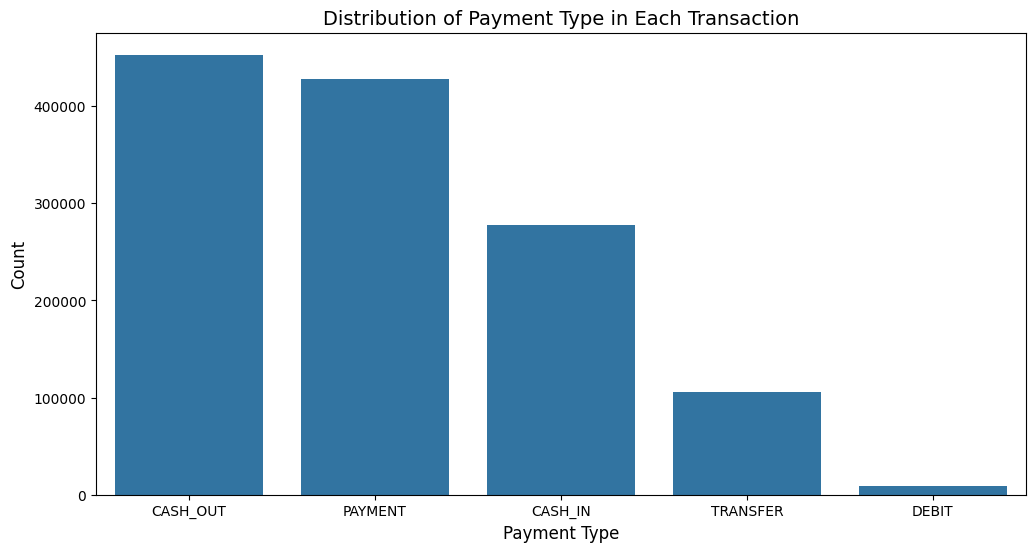

In [22]:

# 1. Bar Plot: plot payment type transactione

plt.figure(figsize=(12, 6))
sns.countplot(
    x='payment_type', 
    data=df_clean, 
    order=df_clean['payment_type'].value_counts().index,
)

plt.title('Distribution of Payment Type in Each Transaction', fontsize=14)  
plt.xlabel('Payment Type', fontsize=12)  
plt.ylabel('Count', fontsize=12)
plt.show() 

The bar chart indicates that 'cash out' transactions are the most frequent, while 'debit' transactions are the least common. This helps us understand the patterns of customer transactions."

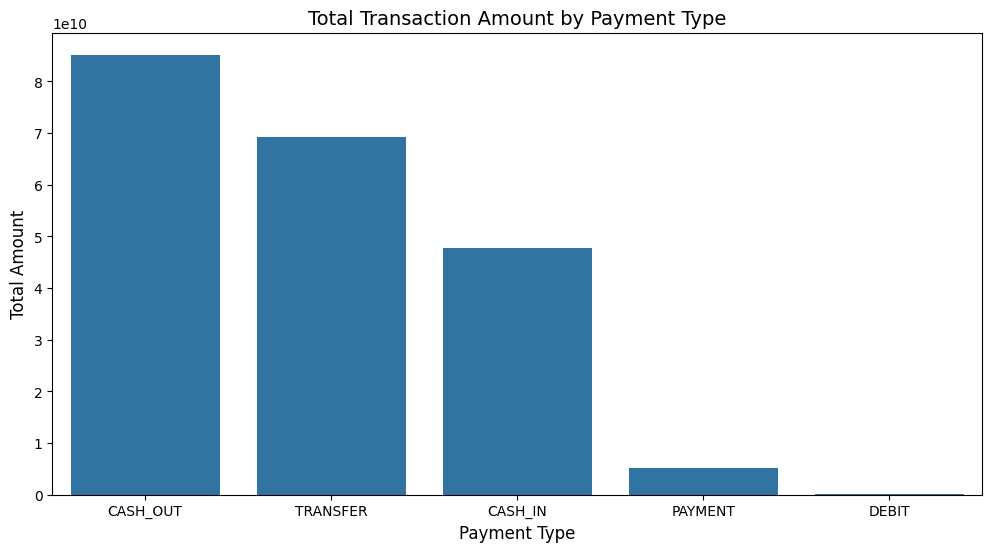

In [23]:
# sum amounts by payment type
amount_by_payment_type = df_clean.groupby('payment_type')['amount'].sum().reset_index()
amount_by_payment_type_sorted = amount_by_payment_type.sort_values('amount', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='payment_type', 
    y='amount', 
    data=amount_by_payment_type_sorted,
)

plt.title('Total Transaction Amount by Payment Type', fontsize=14)
plt.xlabel('Payment Type', fontsize=12)
plt.ylabel('Total Amount', fontsize=12)
plt.show()

The bar chart indicates that 'cash out' transactions have the most amount, while 'debit' transactions are the least common.

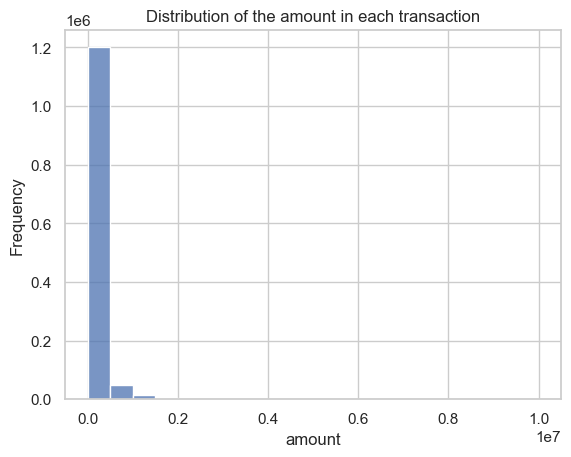

In [22]:
#setting up the aesthetics for the plots
sns.set(style="whitegrid")

# Distribution of the amount in each transaction
sns.histplot(data = df_clean, x= "amount", bins = 20,)
plt.xlabel("amount")
plt.ylabel("Frequency")
plt.title('Distribution of the amount in each transaction')
plt.show()

This plot visualizes the distribution of amounts in the transactions, indicating that there are significant outliers.

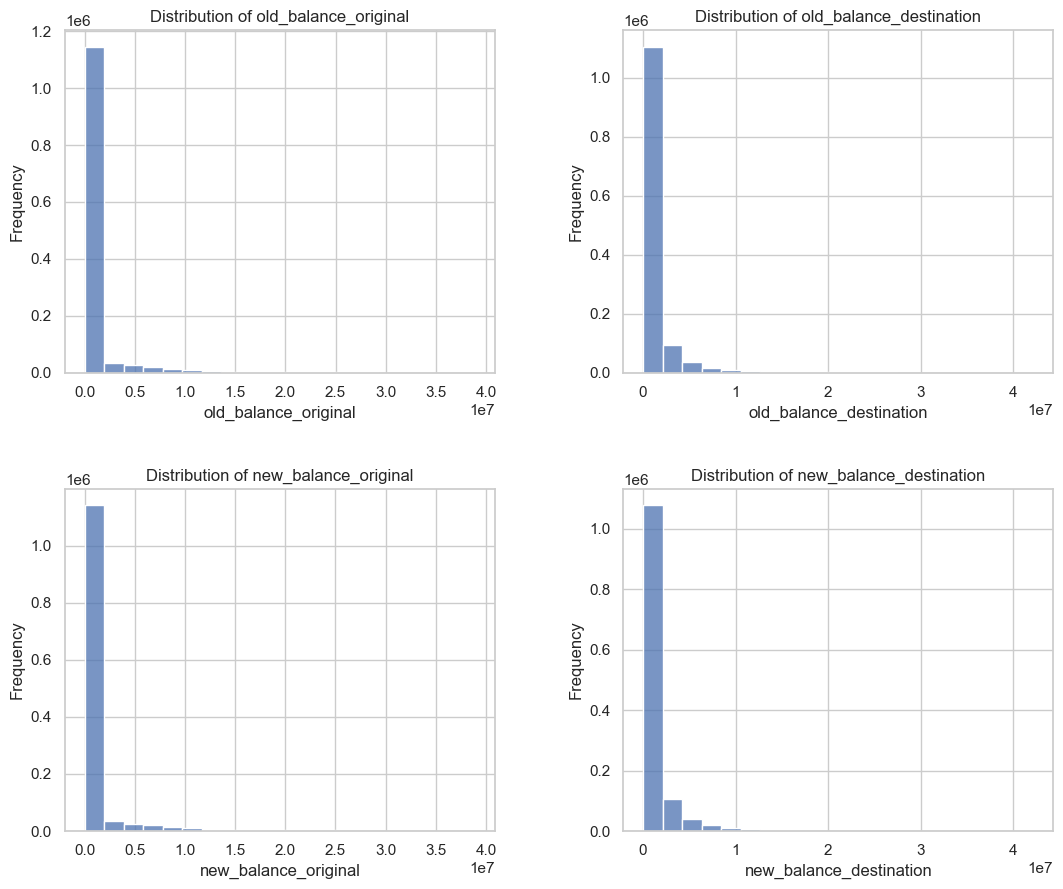

In [36]:
columns = ["old_balance_original", "old_balance_destination", "new_balance_original","new_balance_destination"]

sns.set(style="whitegrid")

# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=5.0)  

axes_flat = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(data=df_clean, x=column, bins=20, ax=axes_flat[i])
    axes_flat[i].set_xlabel(column)
    axes_flat[i].set_ylabel("Frequency")
    axes_flat[i].set_title(f'Distribution of {column}')

plt.show()


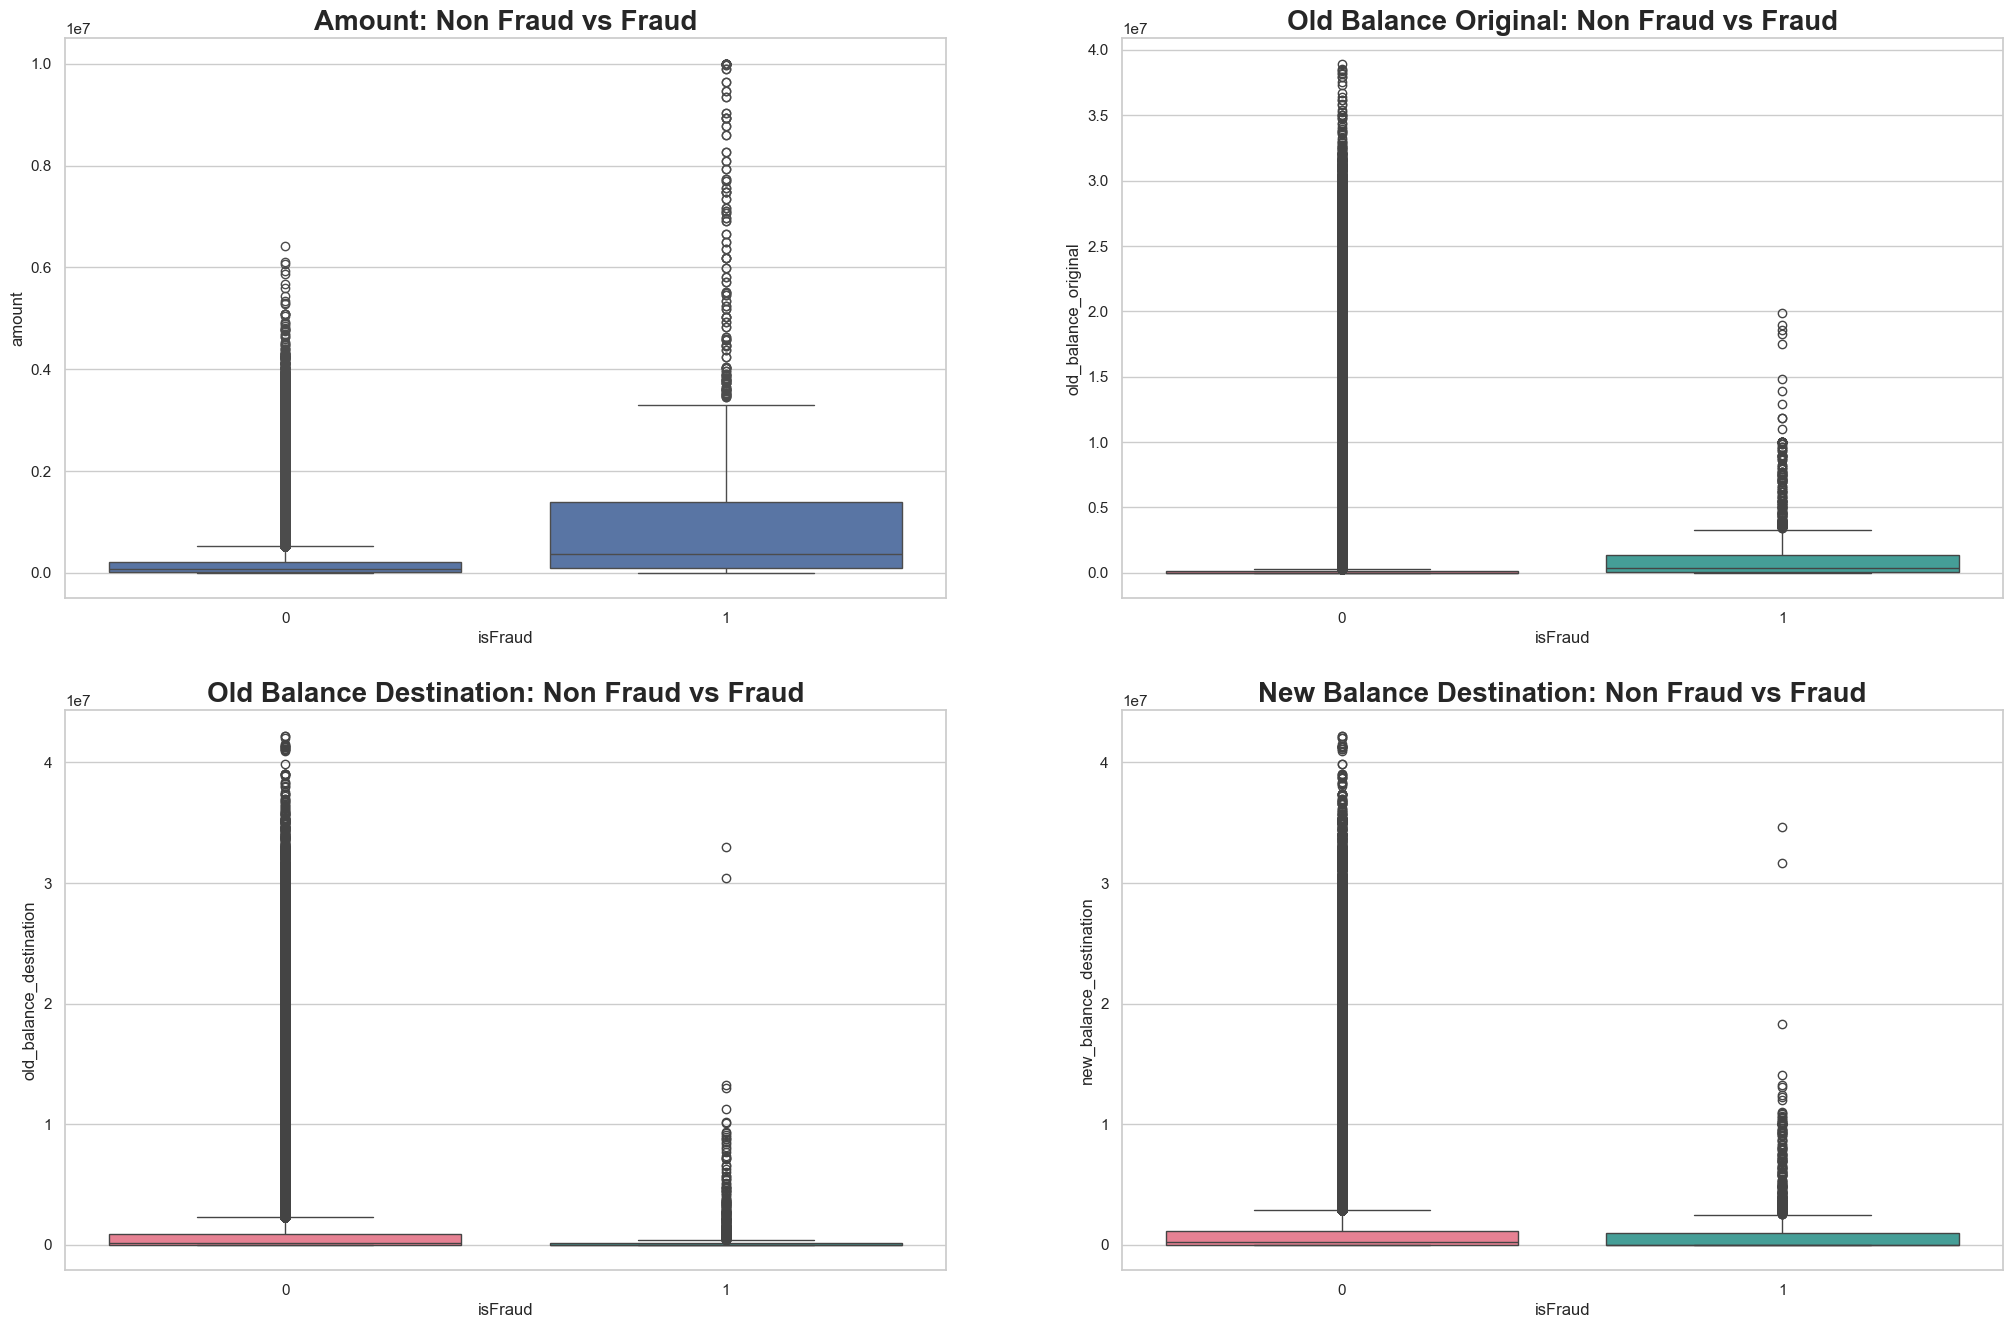

In [25]:
# Set the figure size
plt.figure(figsize=(25, 16))

# Plot 1: amount 
plt.subplot(2, 2, 1)
sns.boxplot(x='isFraud', y='amount', data=df_clean)
plt.title('Amount: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 2: old_balance_original
plt.subplot(2, 2, 2)
sns.boxplot(x='isFraud', y='old_balance_original', data=df_clean, palette="husl")
plt.title('Old Balance Original: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 3: old_balance_destination
plt.subplot(2, 2, 3)
sns.boxplot(x='isFraud', y='old_balance_destination', data=df_clean, palette='husl')
plt.title('Old Balance Destination: Non Fraud vs Fraud', fontweight="bold", size=20)

# Plot 4: new_balance_destination
plt.subplot(2, 2, 4)
sns.boxplot(x='isFraud', y='new_balance_destination', data=df_clean, palette="husl")
plt.title('New Balance Destination: Non Fraud vs Fraud', fontweight="bold", size=20)

# Show the plots
plt.show()

This box plots  is shown to compares the distribution of each variables which are 'old_balance_destination,' 'old_balance_original,' 'amount,' and 'new_balance_destination' between fraudulent and non-fraudulent transactions.The visualization in this insight made us  to understand the potential patterns to helps us identified the fraudulent cases in the data.

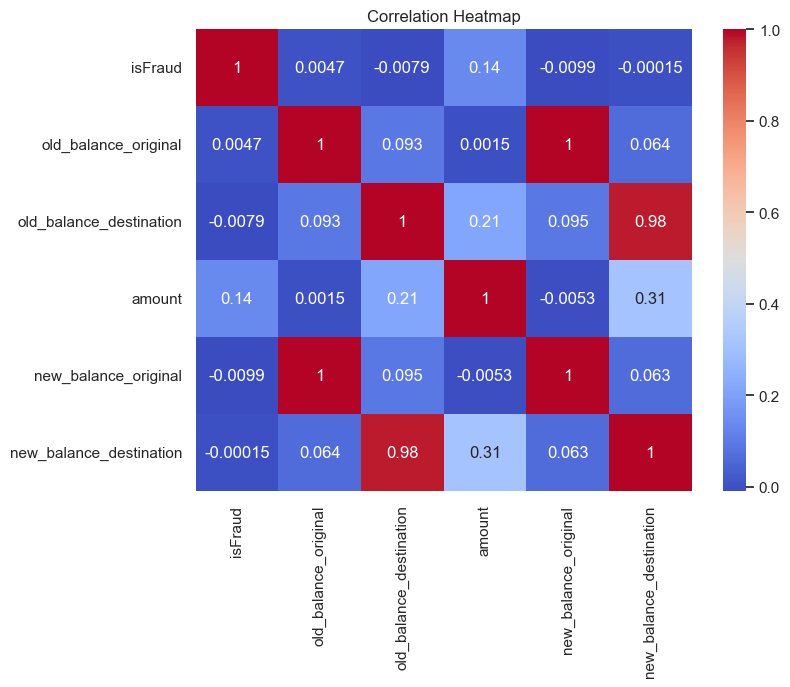

In [26]:
# Heatmap: Correlation between numerical features
correlation_matrix = df_clean[['isFraud', 'old_balance_original','old_balance_destination', 'amount', 'new_balance_original', 'new_balance_destination']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap demonstrate the correlation between the numerical fetaures in the datadets which include old balance original, old balance destination, amount, new balance destination and the isFraud. This information provide an understanding on the relationship within each factors in the fraudulent transactions in the datasets.

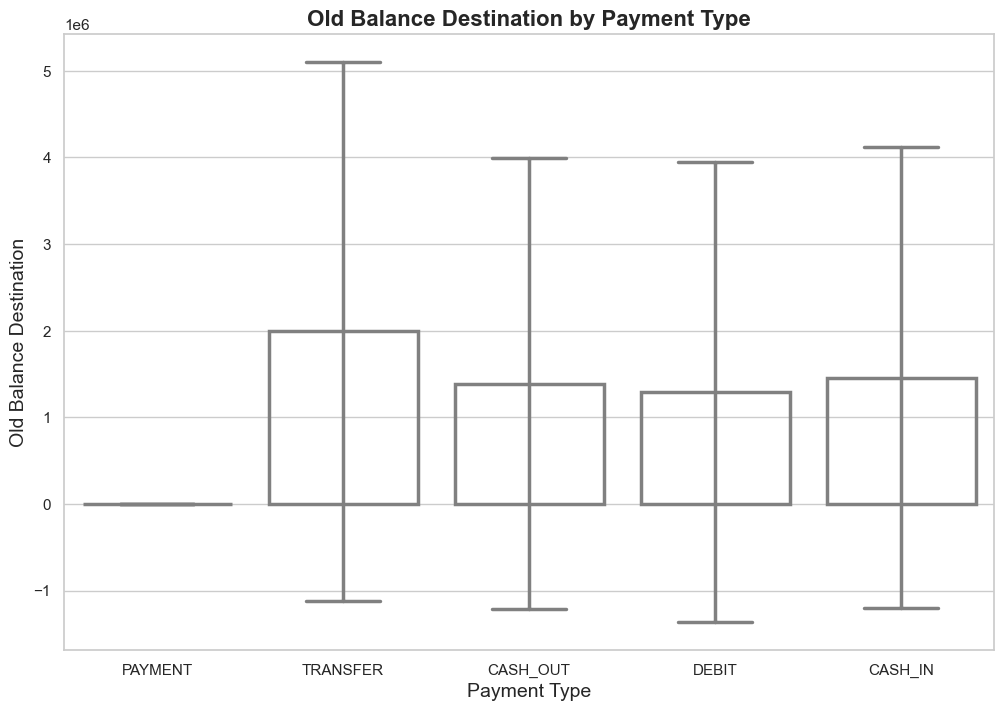

In [27]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define color palette
palette = sns.color_palette("viridis")

# Plot a bar chart with error bars
sns.barplot(x="payment_type", y="old_balance_destination", data=df_clean, 
            ci="sd", capsize=0.4, errcolor=".5", errwidth=2.5, 
            linewidth=2.5, edgecolor=".5", facecolor=(0, 0, 0, 0), palette=palette)

# Set plot title and labels
plt.title('Old Balance Destination by Payment Type', fontweight="bold", size=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Old Balance Destination', fontsize=14)

# Show the plot
plt.show()

This code help us to understand the  visualization information from the bar chart that compares the Old Balance Destination across different 'Payment Types' in the dataset. The chart helps in understanding how the Old Balance Destination differentiate from the payment types. while the error bars provide a positive insight to the data points.

# Fraud Work

In [37]:
fraud_filter = df_clean['isFraud'] == 1
fraud = df_clean[fraud_filter]
fraud.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
2,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
251,TRANSFER,2806.00,C1420196421,2806.00,0.00,C972765878,0.00,0.00,1
252,CASH_OUT,2806.00,C2101527076,2806.00,0.00,C1007251739,26202.00,0.00,1
680,TRANSFER,20128.00,C137533655,20128.00,0.00,C1848415041,0.00,0.00,1


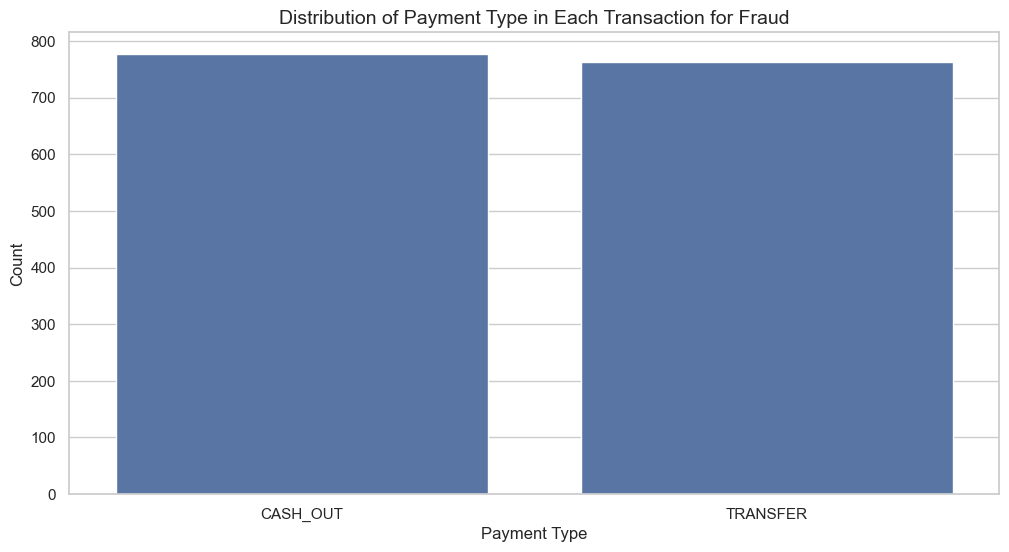

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='payment_type', 
    data=fraud, 
    order=fraud['payment_type'].value_counts().index,
)

plt.title('Distribution of Payment Type in Each Transaction for Fraud', fontsize=14)  
plt.xlabel('Payment Type', fontsize=12)  
plt.ylabel('Count', fontsize=12)
plt.show() 

This shows that fraud mostly happens with CASH_OUT or TRANSFER.

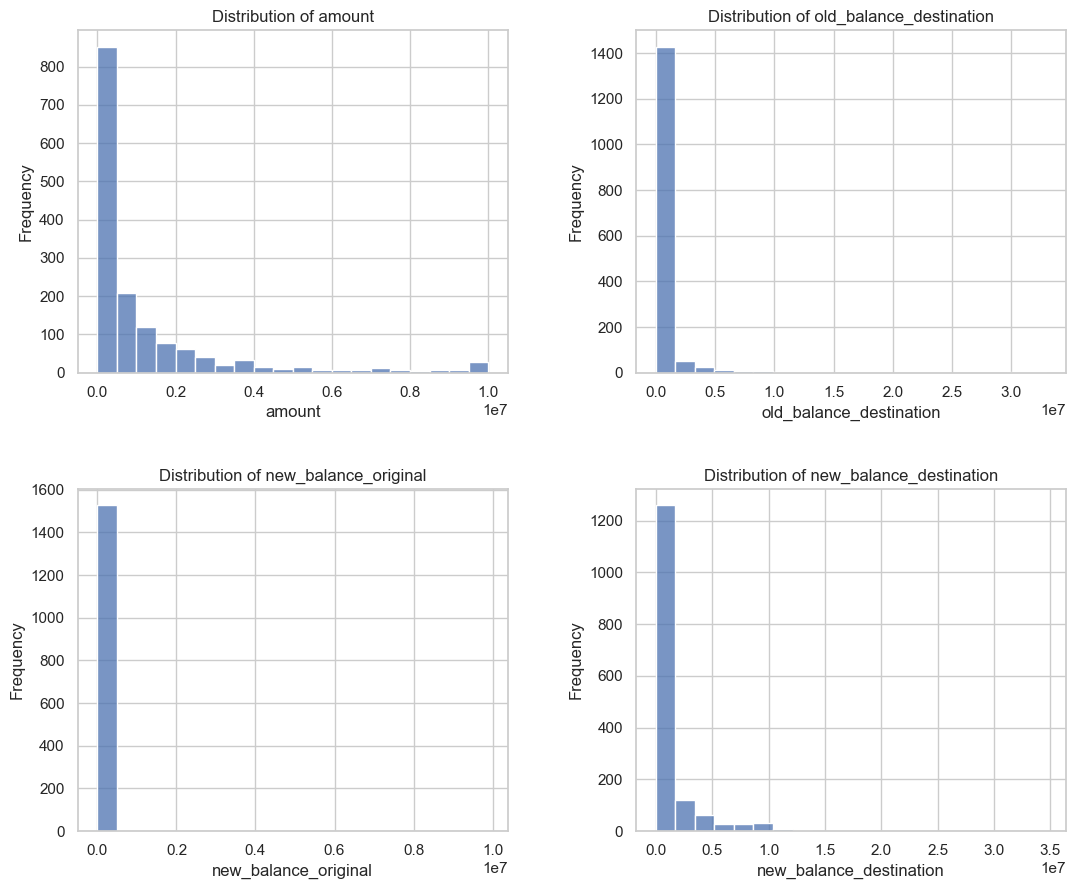

In [42]:
columns = ["amount", "old_balance_destination", "new_balance_original","new_balance_destination"]

sns.set(style="whitegrid")

# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=5.0)  

axes_flat = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(data=fraud, x=column, bins=20, ax=axes_flat[i])
    axes_flat[i].set_xlabel(column)
    axes_flat[i].set_ylabel("Frequency")
    axes_flat[i].set_title(f'Distribution of {column}')

plt.show()

# Non Fraud Work

In [44]:
# filter of non fraud cases
non_fraud_filter = df_clean['isFraud'] == 0
non_fraud = df_clean[non_fraud_filter]
non_fraud.head()

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
4,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
6,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0


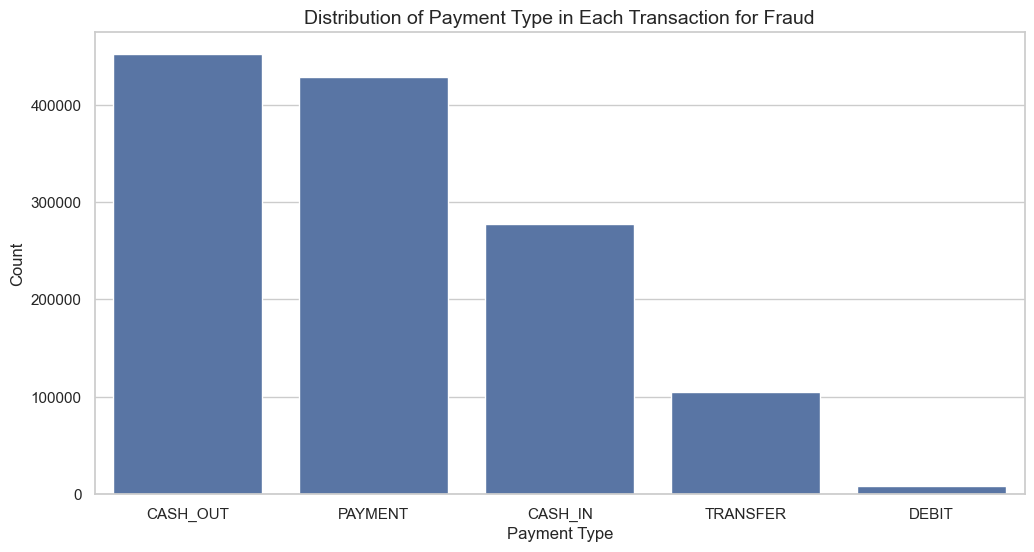

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='payment_type', 
    data=non_fraud, 
    order=non_fraud['payment_type'].value_counts().index,
)

plt.title('Distribution of Payment Type in Each Transaction for Fraud', fontsize=14)  
plt.xlabel('Payment Type', fontsize=12)  
plt.ylabel('Count', fontsize=12)
plt.show() 

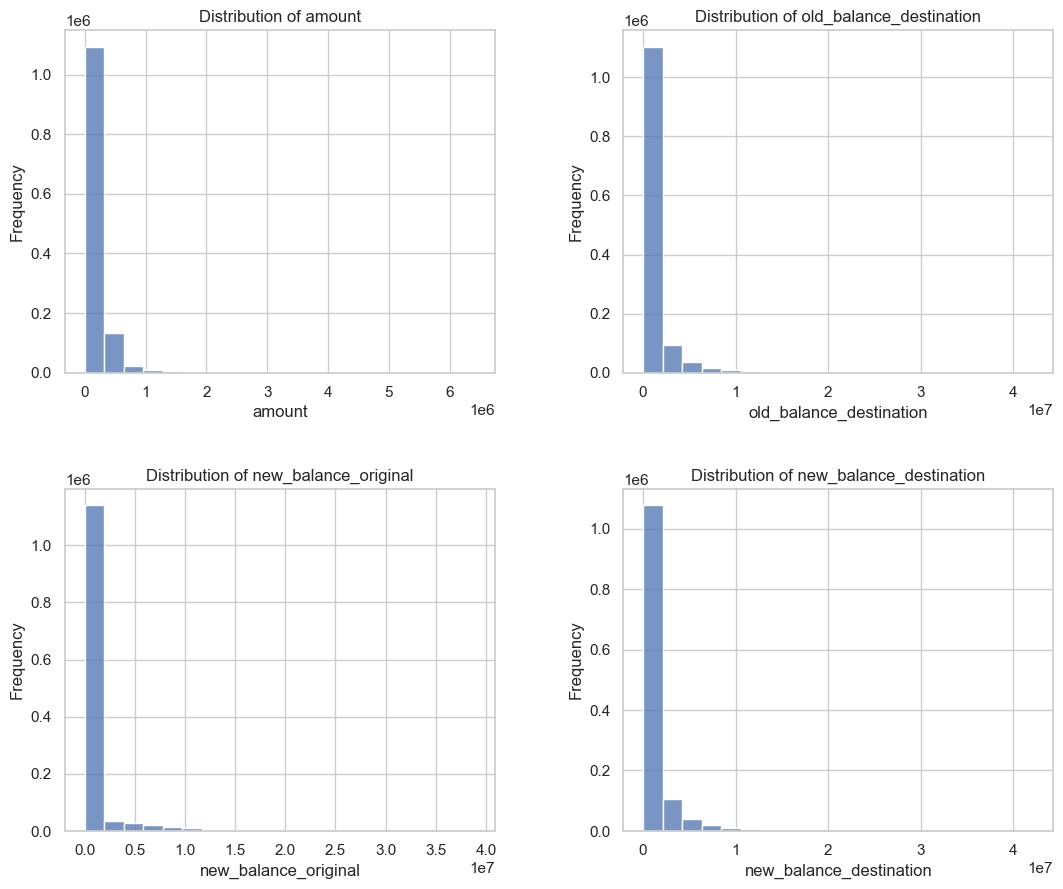

In [47]:
columns = ["amount", "old_balance_destination", "new_balance_original","new_balance_destination"]

sns.set(style="whitegrid")

# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=5.0)  

axes_flat = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(data=non_fraud, x=column, bins=20, ax=axes_flat[i])
    axes_flat[i].set_xlabel(column)
    axes_flat[i].set_ylabel("Frequency")
    axes_flat[i].set_title(f'Distribution of {column}')

plt.show()

# Detect remove outliers

<Axes: xlabel='amount', ylabel='Count'>

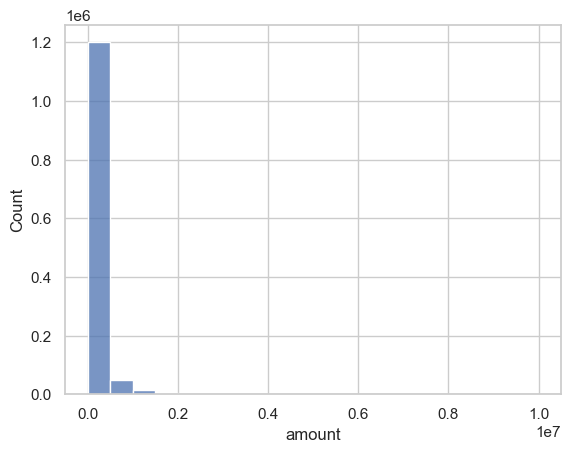

In [85]:
sns.histplot(data = df_clean, x= "amount", bins = 20,)

In [86]:
#finding IQR
percentile25=df_clean['amount'].quantile(0.25)
percentile75=df_clean['amount'].quantile(0.75)
print(percentile25)
print(percentile75)

12802.97
218324.2525


In [87]:
iqr=percentile75-percentile25
iqr

205521.2825

In [88]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 526606.17625
Lower limit -295478.95375000004


In [89]:
df_remove_outlier = df_clean[(df_clean['amount'] < upper_limit)] 

<Axes: xlabel='amount', ylabel='Count'>

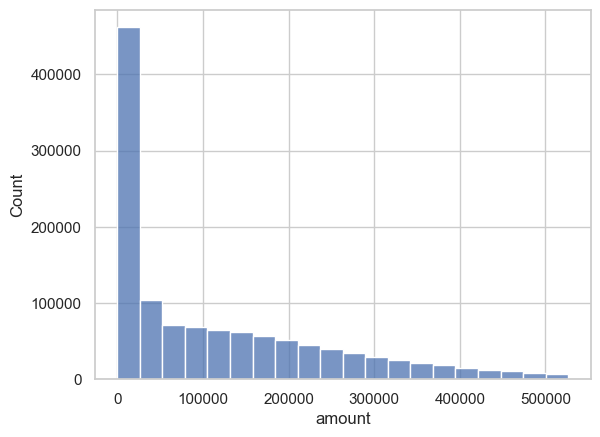

In [90]:
sns.histplot(data = df_remove_outlier, x= "amount", bins = 20,)

**remove outlier for old balance org**

<Axes: xlabel='old_balance_original', ylabel='Count'>

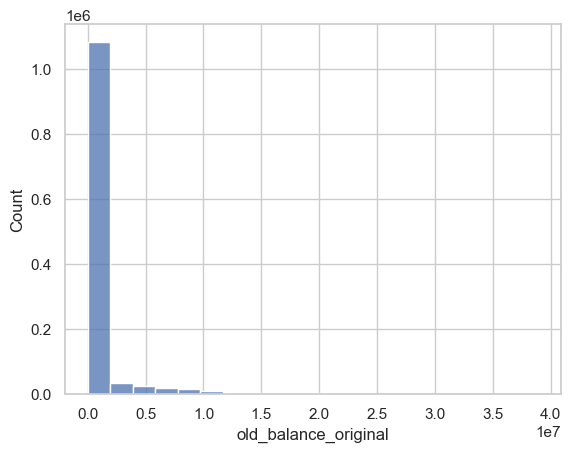

In [91]:
sns.histplot(data = df_remove_outlier, 
             x= "old_balance_original", 
             bins = 20)

In [92]:
#finding IQR
percentile25=df_remove_outlier['old_balance_original'].quantile(0.25)
percentile75=df_remove_outlier['old_balance_original'].quantile(0.75)
print('percentile25:',percentile25,'percentile75:', percentile75)

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit",lower_limit,"; Upper limit",upper_limit)

percentile25: 0.0 percentile75: 139903.99
Lower limit -308281.92375 ; Upper limit 448185.91375


In [93]:
df_remove_outlier = df_remove_outlier[(df_remove_outlier['old_balance_original'] > upper_limit)] 

<Axes: xlabel='old_balance_original', ylabel='Count'>

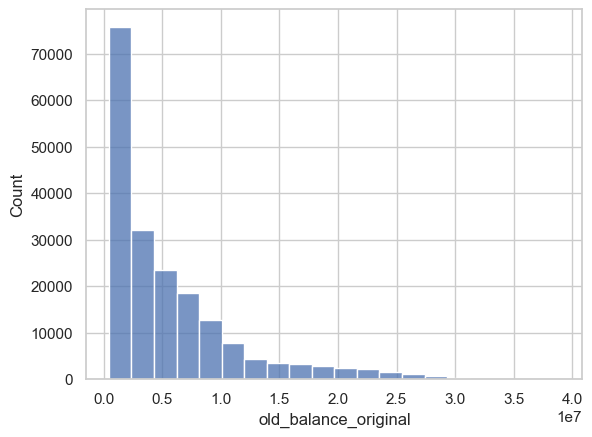

In [94]:
sns.histplot(data = df_remove_outlier, x= "old_balance_original", bins = 20,)

In [95]:
df_remove_outlier.shape

(192184, 9)

In [96]:
# from pathlib import Path
# output_file = '../data/processed/PS_20174392719_1491204439457_log_0.csv'
# output_dir = Path('../data/processed')
# output_dir.mkdir(parents=True, exist_ok=True)
# df_remove_outlier.to_csv(output_file)  # can join path elements with / operator

In [97]:
df_remove_outlier.to_csv("../../data/processed/fraud_clean.csv")

,payment_type,amount,original_owner_id,old_balance_original,new_balance_original,destination_account_id,old_balance_destination,new_balance_destination,isFraud
14,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0
62,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.00,0.00,0
63,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0
241,PAYMENT,4635.18,C1110698130,6313782.05,6309146.87,M125644421,0.00,0.00,0
242,PAYMENT,1267.97,C1053632127,6309146.87,6307878.90,M1493158871,0.00,0.00,0
